<a href="https://colab.research.google.com/github/RaulOAlves/Agricultural_Raw_Material_prices_-1990_2020-/blob/main/Agricultural_Raw_Material_prices_(1990_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agricultural Raw Material prices (1990-2020)

* A base de dados contém informações sobre os preços de matérias-primas agrícolas de 1990 a 2020.

* As informações são provenientes da Organização das Nações Unidas para Agricultura e Alimentação (FAO).

* A base de dados inclui informações sobre os preços de uma variedade de matérias-primas agrícolas, incluindo alimentos básicos, como arroz, trigo e milho, bem como produtos agrícolas não alimentares, como algodão e borracha.

* Os preços são apresentados em dólares americanos e em termos nominais e reais.

* Além dos preços médios anuais, a base de dados também inclui informações sobre os preços mensais.

* A base de dados é atualizada anualmente, com as informações mais recentes disponíveis até 2020.

* A base de dados é útil para pesquisadores, economistas, profissionais do setor agrícola e outras pessoas interessadas em analisar e compreender os preços das matérias-primas agrícolas ao longo do tempo.


In [2]:
# Importação das Bibliotecas
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Carregar o conjunto de dados em um quadro de dados usando o Pandas

In [4]:
# Importar o dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estudos_gerais/Agricultural_Raw_Material_prices_(1990-2020)/agricultural_raw_material.csv')

In [5]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


## Explorando o conjunto de dados

In [6]:
# Verificar a estrutura dos dados
df.info

# Verificar se tem registros nulos
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

### Tratar os dados ausentes, incorretos e inválidos

In [7]:
# Replacing %, ',' e '-'
df = df.replace ('%', '', regex=True)
df = df.replace (',', '', regex=True)
df = df.replace ('-', '', regex=True)
df = df.replace ('', np.nan)
#df = df.replace ('MAY90', np.nan)

# Excluir linhas com valores nulos
df = df.dropna()

# Checar se todos os valores nulos foram removidos
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [8]:
# Converter os dados para float para poder realizar operações matemáticas e estatísticas
prices = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price' , 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
changes = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

lst = prices + changes
df[lst] = df[lst].astype('float')
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [9]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


### Colunas de datas e hora

In [10]:
# Formatando a coluna Month para datatime
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

# Definindo a coluna Month como Index
df = df.set_index('Month')

In [11]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## Análsie Exploratória e Visualização dos dados

In [12]:
# Importação das bibliotecas Matplotlib.pyplot e seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Estilo dos gráficos
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Mapa de calor

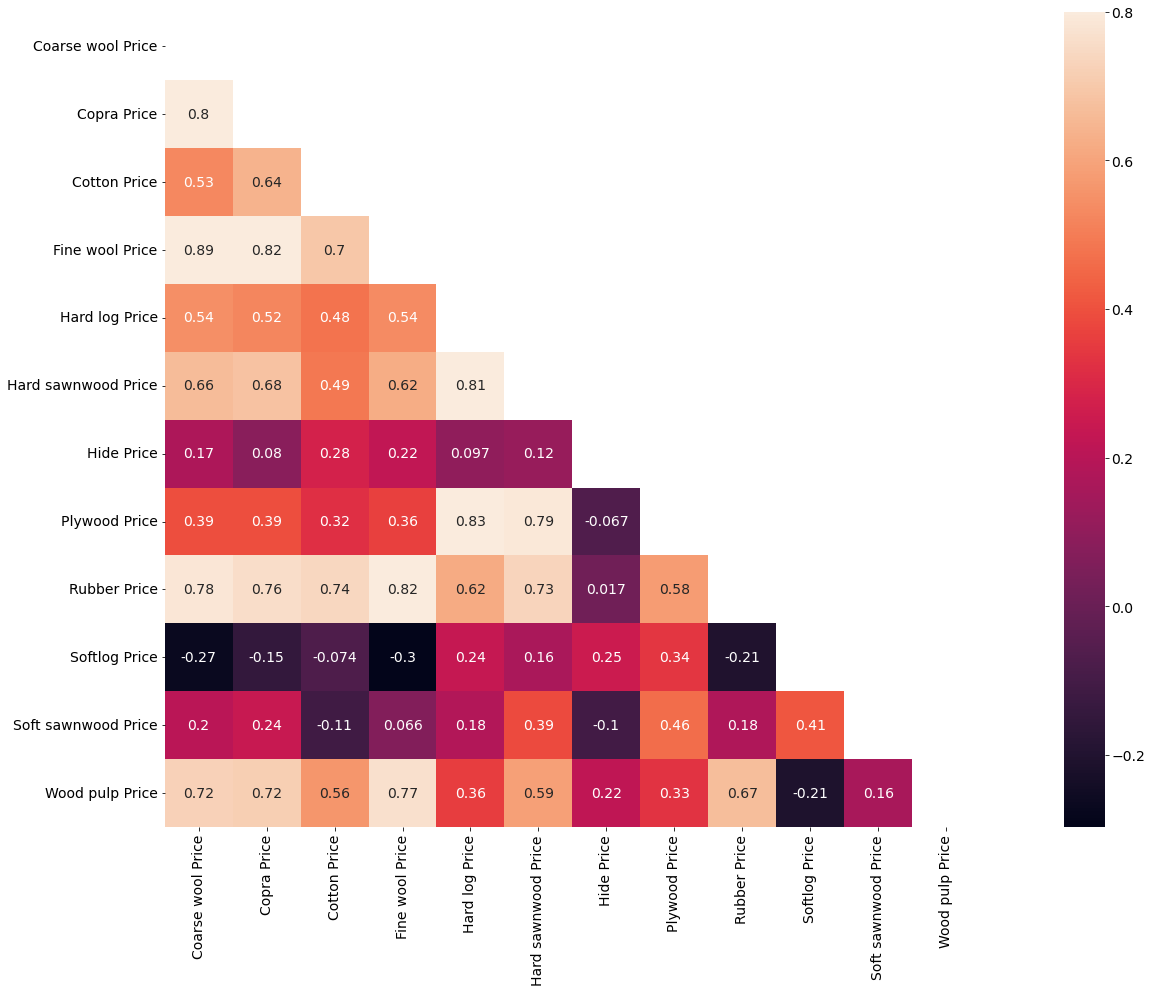

In [14]:
# Verificando a matriz de correlação dos preços dos produtos
corrmat = df[prices].corr()

# Configurando o tamanho do gráfico
fig = plt.figure(figsize = (30,15))

# Criando uma mascara para facilitar a visualuzação
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Plotando o Mapa de Calor da correlação dos preços
sns.heatmap(corrmat, vmax=.8, mask=mask, square= True, annot=True)
plt.show()

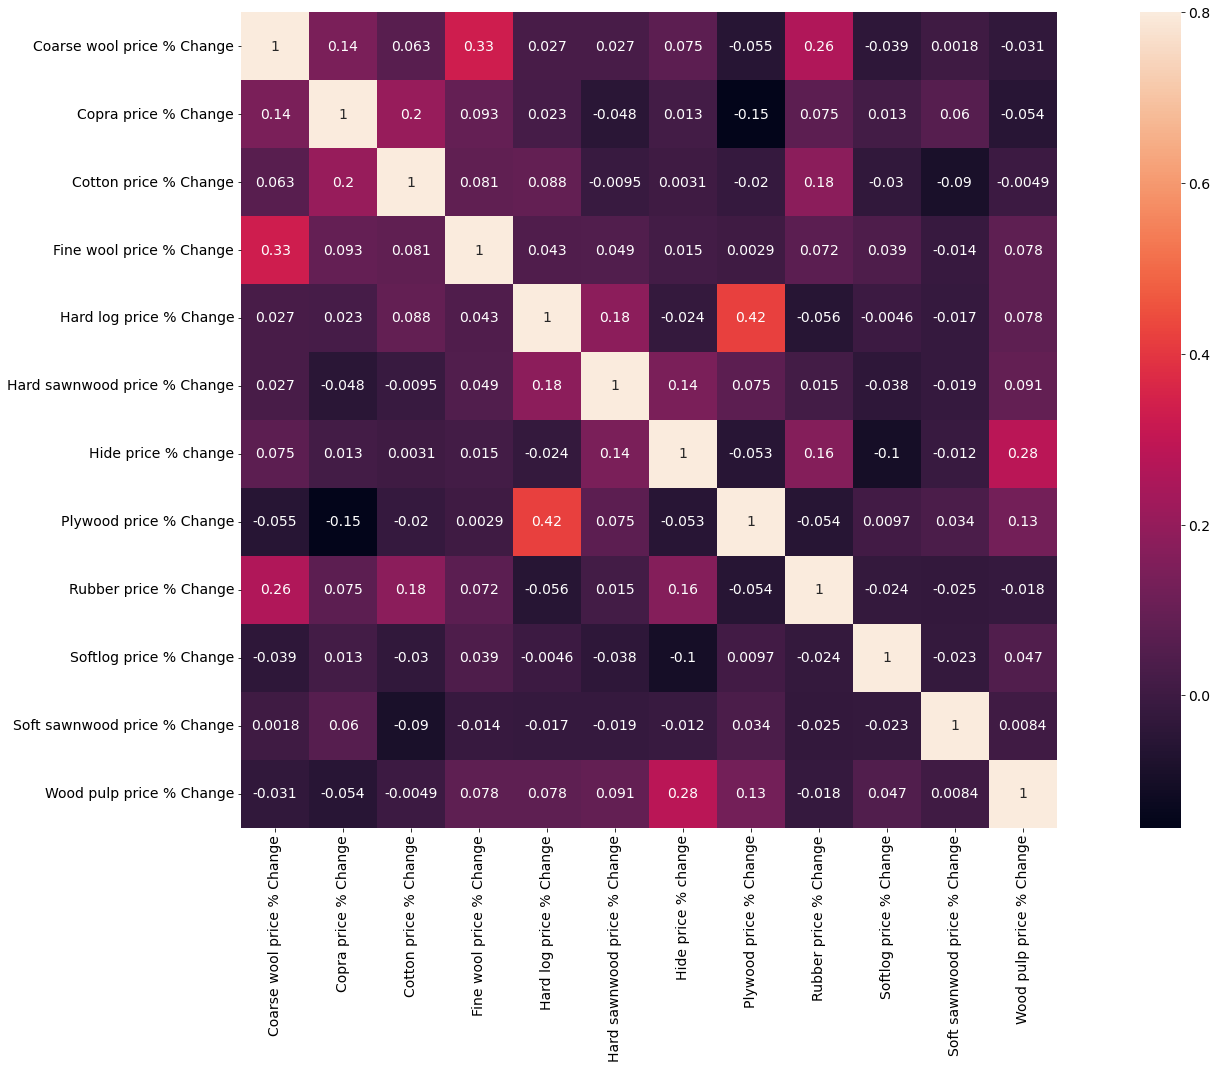

In [15]:
# Verificando a matriz de correlação das variações dos preços dos produtos
corrmat = df[changes].corr()

# Configurando o tamanho do gráfico
fig = plt.figure(figsize = (30,15))

# Plotando o Mapa de Calor da correlação dos preços
sns.heatmap(corrmat, vmax=.8, square= True, annot=True)
plt.show()

Percebemos aqui que não há uma correlação da variação percentual com os preços das matérias primas.

- O valor negativo implica que que as variáveis estão correlacionadas negativamente (um aumenta, o outro diminui)
- Zero indica nenhuma correlação
- Quanto maior o valor, maior a chance de correlação

### Análisando o Preço e a Variação de uma matéria prima ao longo do tempo


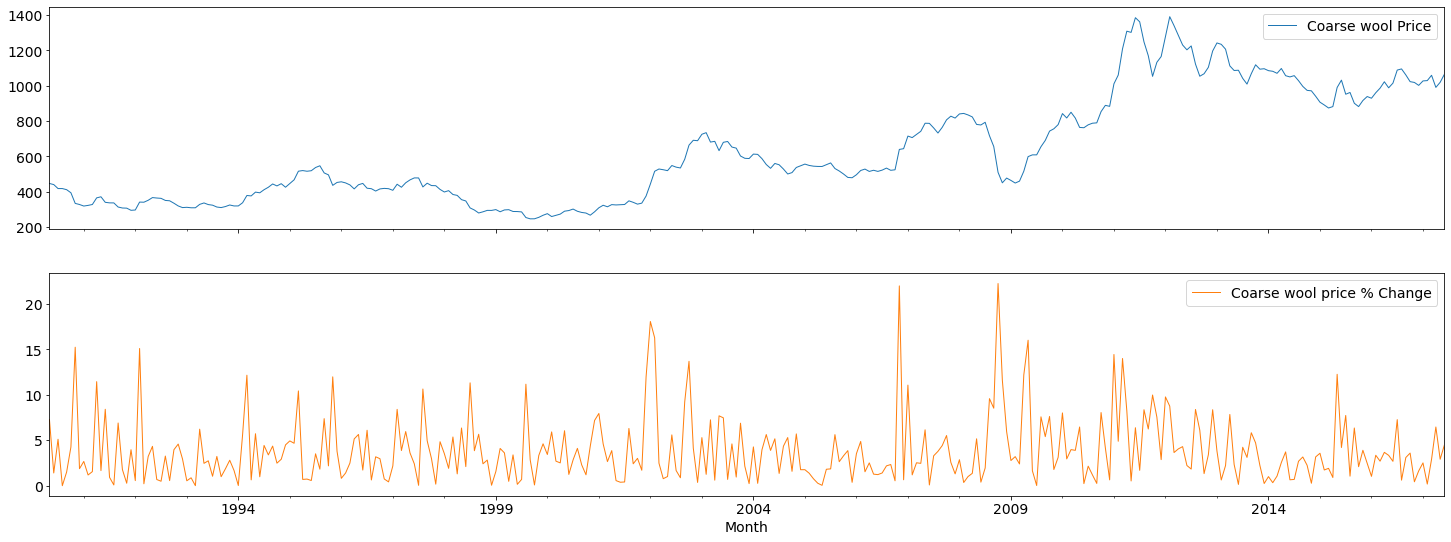

In [16]:
# Lã Grossa
axes=df[['Coarse wool Price','Coarse wool price % Change']].plot(figsize=(25,9), subplots=True, linewidth=1)

## Predições

In [17]:
# Importando o módulo train_test_split para treinar o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
# Vamos supor que queremos prever o valor do algodoão

# Variáveis independentes
x = df.drop('Cotton Price', axis=1)

# Variáveis dependentes
y = df['Cotton Price']

In [19]:
# Gerando amostras aleatórias para treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 60)

In [20]:
# Modelo de regressão linear

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [21]:
# Prevendo as amostras de teste

y_pred = model.predict(x_test)

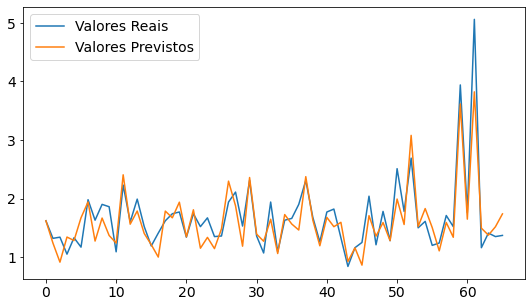

In [22]:
# Plotando o gráfico comparativo Valores Reais x Valores Previstos

plt.plot(y_test.values.flatten(), label='Valores Reais')
plt.plot(y_pred.flatten(), label ='Valores Previstos')
plt.legend()
plt.show()

In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R²: ', r2)
print('MSE: ', mse)

R²:  0.7940339080727028
MSE:  0.08105512793613813


## Perguntas e Respostas de Negócios



### **1.   Descubra a variação normal do preço para cada matéria-prima**




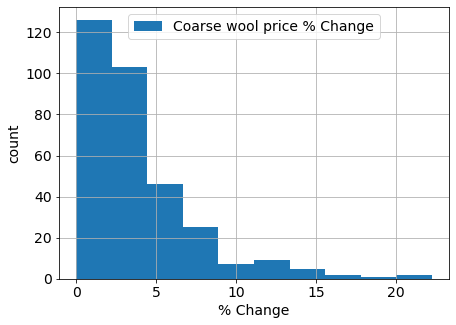

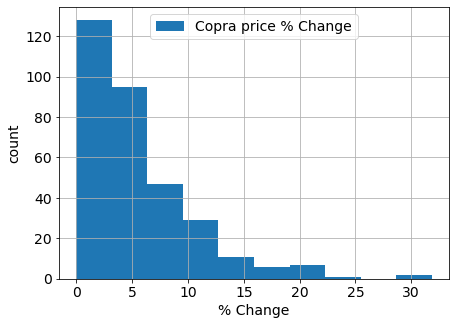

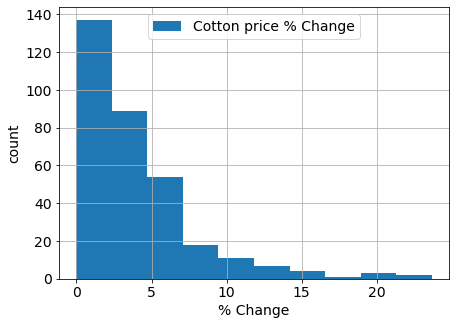

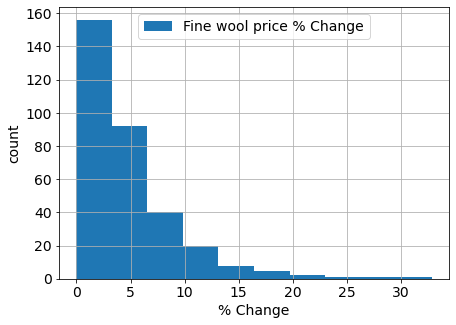

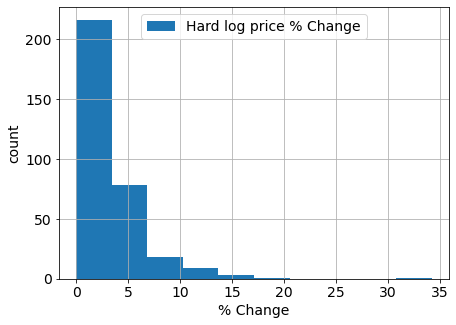

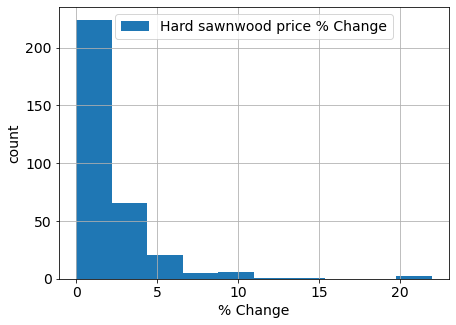

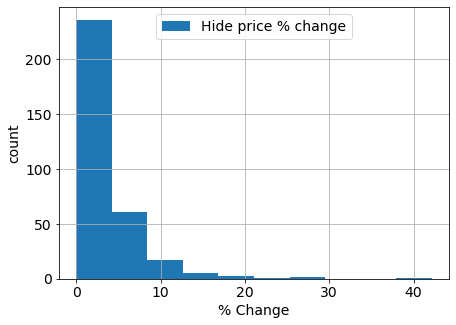

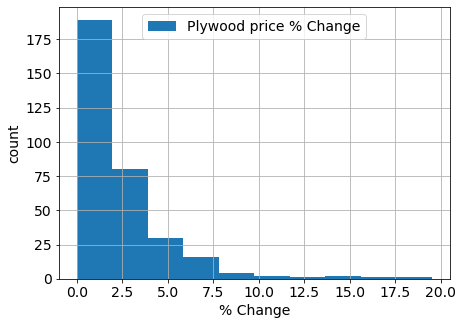

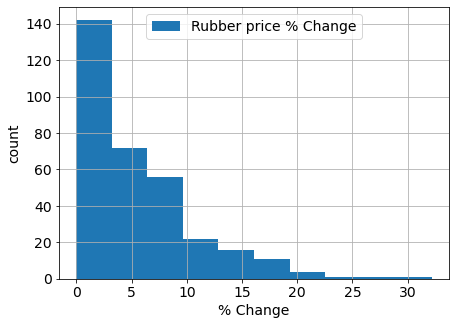

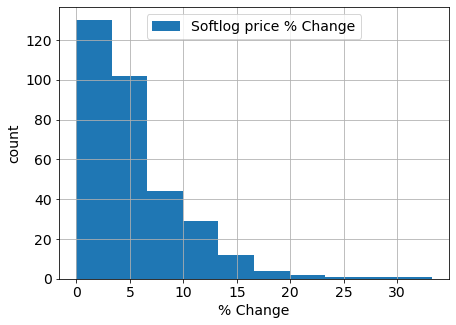

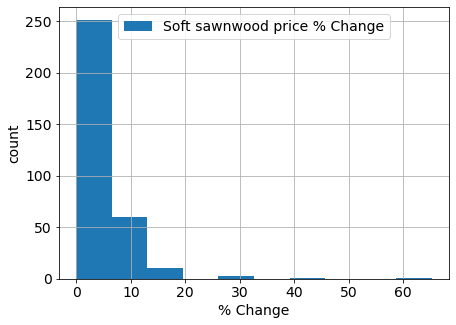

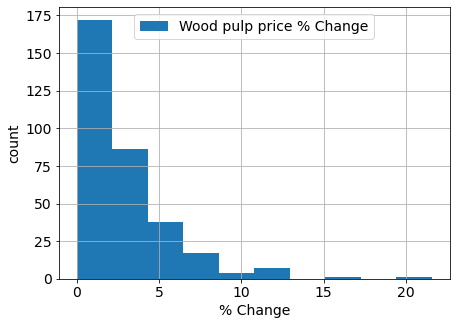

In [33]:
for i in range(len(changes)):
  plt.figure(figsize=(12,12))
  df[changes[i]].hist(figsize=(7,5), linewidth=1)
  plt.xlabel('% Change')
  plt.ylabel('count')
  plt.legend(changes[i:], loc='upper center')
